# #10 : GLM 

In [1]:
library(readxl)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

√ ggplot2 3.1.1       √ purrr   0.3.4  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  

Warning message:
"package 'purrr' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()



## PART 1. Poisson GLM : 흡연과 폐암 

* $y_i$ : # of lung cancer deaths in a year, $i = 1,...,m, m = 4\times9 = 36$   
* $n_i$ : populations (단위 100,000명) 
* $x_{i1}$ : 5-year age groups (1-9 ; 40-44, ..., 75-79, 80+) 
* $x_{i2}$ : smoking status     
  - 1 : no smoke 
  - 2 : smoke cigar or pipe only 
  - 3 : smoke cigarettes and cigar/pipe 
  - 4 : smoke cigarettes only 

In [2]:
cancer <- read_xlsx("lungcancer-yieldcurve.xlsx", sheet=1)
cancer <- as_tibble(cancer) %>% rename(x1=Age,x2=Smoke,n=Pop,y=Lung) %>% mutate(a=(37+5*x1),ln_ybar=log(y/n),lna=log(a))

### (a) 산점도
* ($ln\bar{y_i}, a_i), (ln\bar{y_i}, lna_i), (ln\bar{y_i}, x_{i2})$ 
* $\bar{y_i} = y_i / n_i, a_i = (37+5\cdot x_{i1})$ : age 

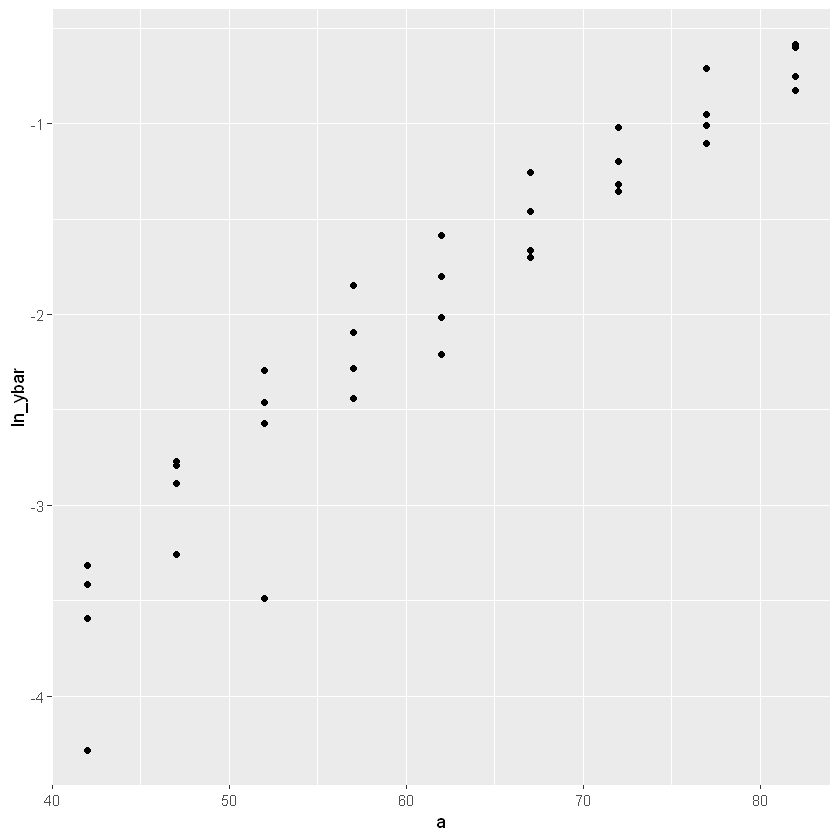

In [3]:
ggplot(cancer,aes(a,ln_ybar))+geom_point()

* linear : 나이가 들수록 사망자 수가 증가한다.

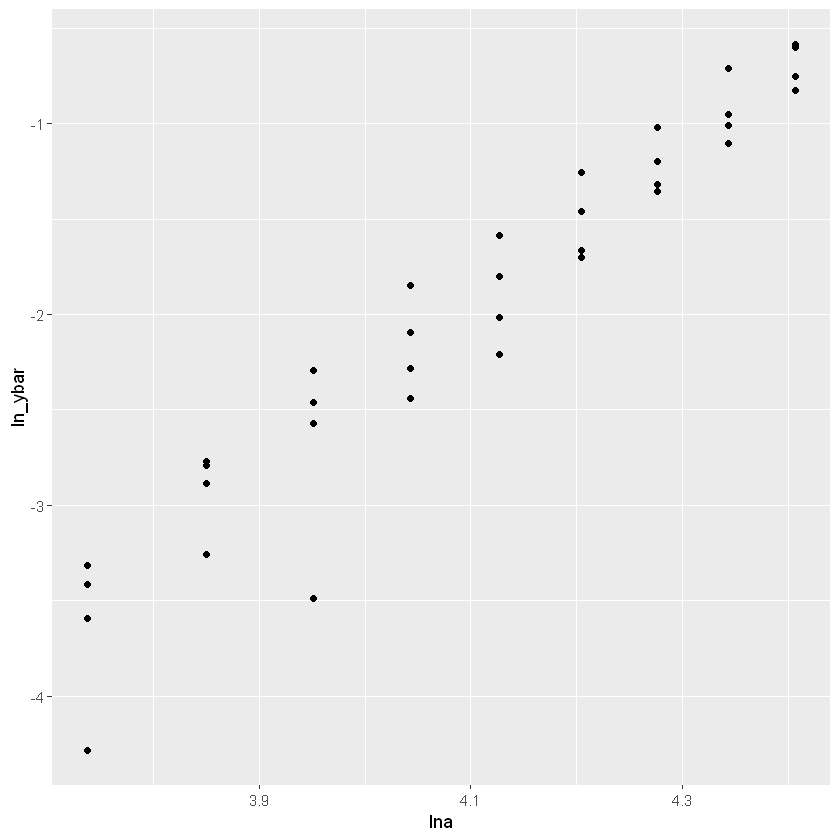

In [4]:
ggplot(cancer,aes(lna,ln_ybar))+geom_point()

* linear : 나이가 들수록 사망자 수가 증가한다.

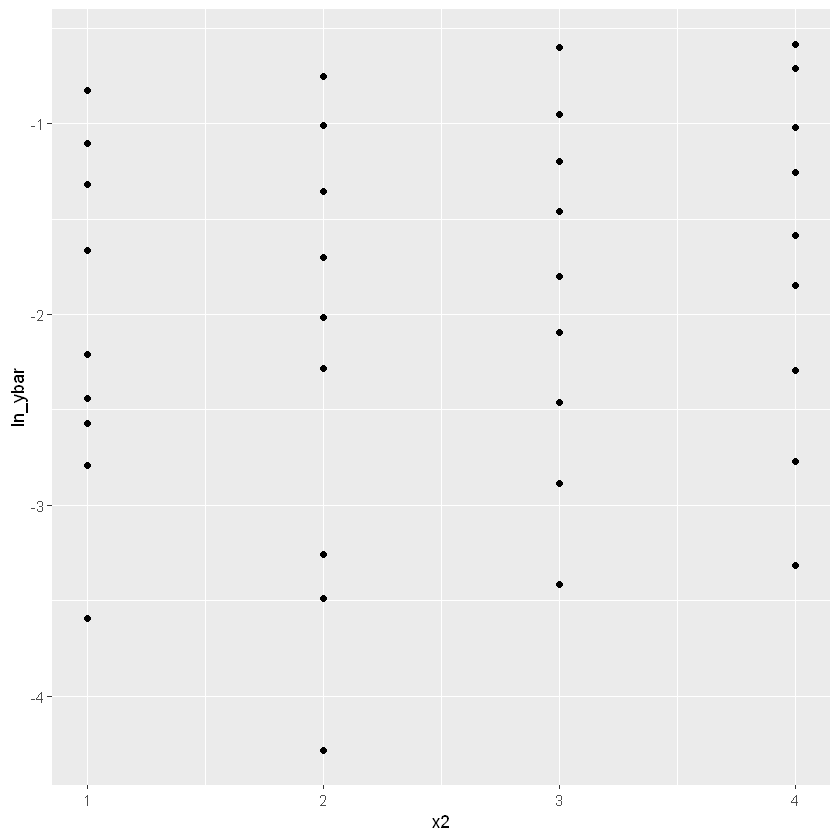

In [5]:
ggplot(cancer,aes(x2,ln_ybar))+geom_point()

* smoke level에 따른 특징이 보이지 않는다. 따라서 smoke status에 따른 사망자 수는 관계가 없다고 할 수 있다. 

### (b) Poisson GLM 
* 범주형 변수 $x_1, x_2$의 지시변수 = $(Z_1, ... , Z_9), (S_1, ... ,S_4)$ 
* H1 : $\ln{\mu} = \beta_0 + \beta_1 \ln{n} + \beta_2 \ln{a} + \sum_{j=2}^{4} \beta_{2+j}S_j$ 
* H2 : $\ln{\mu} = \beta_0 + \beta_1 \ln{n} + \sum_{k=2}^{9} \beta_{k}Z_k  + \sum_{j=2}^{4} \beta_{8+j}S_j$ 

In [6]:
cancer$x1 = as.factor(cancer$x1) ; cancer$x2 = as.factor(cancer$x2)

In [7]:
# x2 지시변수만 고려한 모델 
H1 <- glm(y ~ log(n)+log(a)+x2, family = "poisson", data = cancer)
summary(H1)


Call:
glm(formula = y ~ log(n) + log(a) + x2, family = "poisson", data = cancer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.35696  -0.64816   0.06239   0.69680   1.77542  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -19.25089    0.44084 -43.669  < 2e-16 ***
log(n)        1.01684    0.01853  54.886  < 2e-16 ***
log(a)        4.15138    0.08606  48.241  < 2e-16 ***
x22           0.04433    0.04717   0.940    0.347    
x23           0.19386    0.04722   4.106 4.03e-05 ***
x24           0.40070    0.04414   9.079  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 8434.4  on 35  degrees of freedom
Residual deviance:   27.4  on 30  degrees of freedom
AIC: 279.42

Number of Fisher Scoring iterations: 4


In [8]:
# x1 지시변수까지 고려한 모델 
H2 <- glm(y ~ log(n)+x2+x1, family = "poisson", data = cancer)
summary(H2)


Call:
glm(formula = y ~ log(n) + x2 + x1, family = "poisson", data = cancer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.80070  -0.41646   0.02397   0.45315   1.73289  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.21924    0.25054 -16.841  < 2e-16 ***
log(n)       1.07610    0.03399  31.658  < 2e-16 ***
x22          0.01481    0.04941   0.300   0.7643    
x23          0.11593    0.05975   1.940   0.0524 .  
x24          0.34846    0.05034   6.922 4.45e-12 ***
x12          0.58554    0.08123   7.209 5.65e-13 ***
x13          1.03041    0.07999  12.881  < 2e-16 ***
x14          1.38137    0.06527  21.165  < 2e-16 ***
x15          1.64015    0.06288  26.085  < 2e-16 ***
x16          2.01577    0.06330  31.845  < 2e-16 ***
x17          2.33304    0.07009  33.287  < 2e-16 ***
x18          2.67213    0.08478  31.517  < 2e-16 ***
x19          2.99162    0.09698  30.849  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.

In [9]:
AIC <-  rbind(H1$aic, H2$aic)  
rownames(AIC) <- c("H1", "H2") ; colnames(AIC) <- "AIC" ; AIC

,AIC
H1,279.4228
H2,282.4049


* H1의 AIC가 더 작으므로, H1 모델이 더 적절한 모델이다. 

### (c) Poisson GLM offset 
* H3 : $\beta_1 = 1$ 

In [10]:
H3 <- glm(y ~ offset(log(n))+log(a)+x2, family = "poisson", data = cancer)
summary(H3)


Call:
glm(formula = y ~ offset(log(n)) + log(a) + x2, family = "poisson", 
    data = cancer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2910  -0.6552   0.0777   0.5016   1.8521  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.96227    0.30429 -62.316  < 2e-16 ***
log(a)        4.10852    0.07162  57.366  < 2e-16 ***
x22           0.04915    0.04687   1.049    0.294    
x23           0.21862    0.03854   5.673  1.4e-08 ***
x24           0.41817    0.03971  10.531  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4055.98  on 35  degrees of freedom
Residual deviance:   28.23  on 31  degrees of freedom
AIC: 278.25

Number of Fisher Scoring iterations: 4


In [11]:
AIC <-  rbind(H1$aic, H2$aic, H3$aic)  
rownames(AIC) <- c("H1", "H2", "H3") ; colnames(AIC) <- "AIC" ; AIC

,AIC
H1,279.4228
H2,282.4049
H3,278.2527


* H3의 AIC가 가장 작으므로, $\ln{n}$의 계수를 1로 고정시킨 모형이 가장 적절한 모델이다. 

### (d) 모형의 적합성 검토 (with Deviance 잔차, Pearson 잔차) 

In [12]:
# Deviance residuals
resid(H3, 'deviance')

1           2           3           4           5           6 
 0.04314957  1.55782786  0.66064356 -0.67950442 -2.29096262  0.31097199 
          7           8           9          10          11          12 
 0.98577226  0.15593850  0.34365467 -1.16895243 -0.33593080 -1.61402985 
         13          14          15          16          17          18 
 0.12807119 -0.60558671 -0.85178170 -0.22246189  0.87670040  0.87328128 
         19          20          21          22          23          24 
-0.33594316  0.50139604  0.63911124  0.89004716 -0.38543010  0.25468825 
         25          26          27          28          29          30 
-0.64716589 -0.97274239  0.50220895 -1.43754034 -0.55389669  0.24491528 
         31          32          33          34          35          36 
 1.85211895  0.11225552  0.32328600 -0.92432164 -0.20789495 -1.18146321

In [13]:
# Pearson residuals
resid(H3, 'pearson')

1           2           3           4           5           6 
 0.04322302  1.65755649  0.67844475 -0.66951157 -2.21672801  0.31222051 
          7           8           9          10          11          12 
 0.99825909  0.15631067  0.34547523 -1.05056879 -0.32714773 -1.43601546 
         13          14          15          16          17          18 
 0.12851853 -0.59997058 -0.84283068 -0.22189899  0.88511452  0.88145861 
         19          20          21          22          23          24 
-0.33441972  0.50467161  0.64410702  0.89563457 -0.38465149  0.25504969 
         25          26          27          28          29          30 
-0.64437696 -0.96433785  0.50531374 -1.40820125 -0.54965803  0.24565185 
         31          32          33          34          35          36 
 1.87822043  0.11233094  0.32395303 -0.91759563 -0.20740544 -1.15387953

In [14]:
D <- H3$deviance ; P<-sum(resid(H3,type="pearson")^2)
D ; P

[1] 28.22982

[1] 27.3832

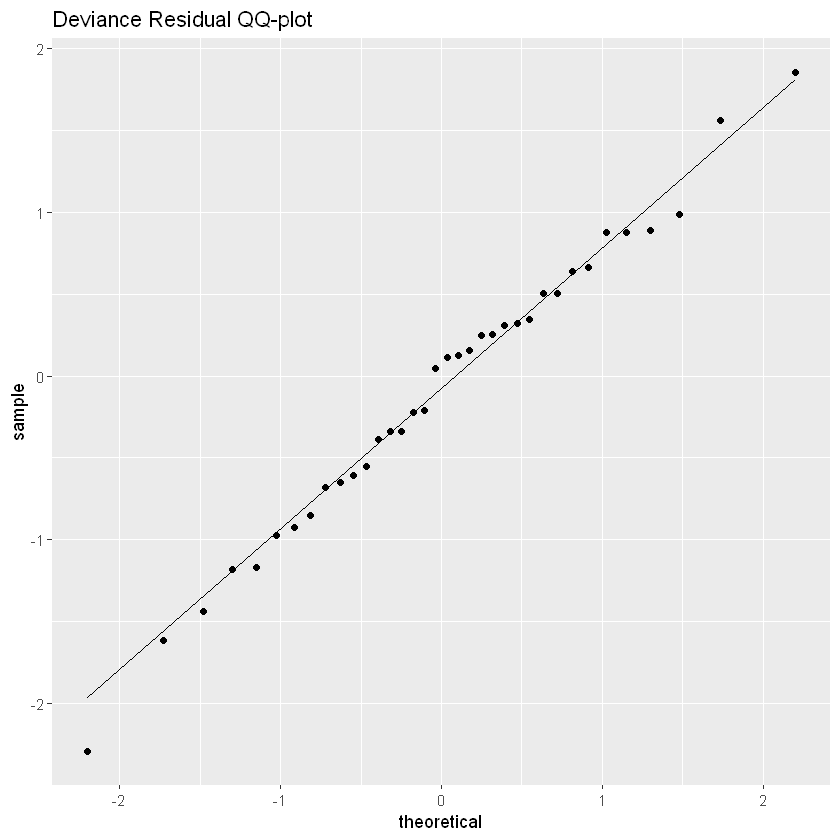

In [15]:
p<-5
cancer = cancer %>% mutate(devi = resid(H3, 'deviance'), pearson = resid(H3, 'deviance'))

# Deviance Residual 
ggplot(cancer) + geom_qq(aes(sample = devi)) + geom_qq_line(aes(sample = devi)) +
  labs(title = 'Deviance Residual QQ-plot')

In [16]:
1-pchisq(D,nrow(cancer)-p) # deviance : p-value

[1] 0.6092779

* 점들이 일직선상에 놓여있으므로 잔차의 정규성을 만족함을 알 수 있다.
* 또한 귀무가설을 채택하므로, H3 모형이 적절한 모형이라고 생각할 수 있다. 

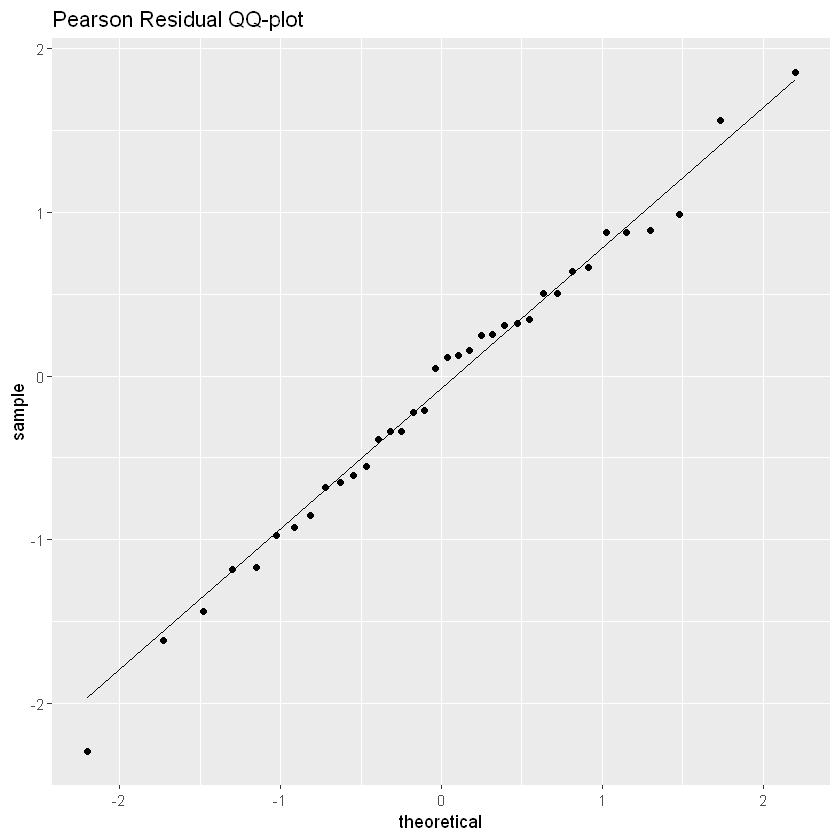

In [17]:
# Pearson Residual 
ggplot(cancer) + geom_qq(aes(sample = pearson)) + geom_qq_line(aes(sample = pearson)) +
  labs(title = 'Pearson Residual QQ-plot ')

In [18]:
1-pchisq(P,nrow(cancer)-p) # pearson : p-value

[1] 0.6527955

* 마찬가지로 점들이 일직선상에 놓여있으므로 잔차의 정규성을 만족함을 알 수 있다.
* 또한 귀무가설을 채택하므로, H3 모형이 적절한 모형이라고 생각할 수 있다. 

### (e) 최적 Poisson GLM : 변수변환, 교호작용 (interaction) 고려

In [19]:
H4 <- glm(y ~ offset(log(n))+log(a)+x2+log(a)*x2,family=poisson(link="log"),data=cancer)
step(H4, direction="both", alpha=0.15)

Start:  AIC=279.81
y ~ offset(log(n)) + log(a) + x2 + log(a) * x2

            Df Deviance    AIC
- log(a):x2  3    28.23 278.25
<none>            23.79 279.81

Step:  AIC=278.25
y ~ log(a) + x2 + offset(log(n))

            Df Deviance    AIC
<none>             28.2  278.3
+ log(a):x2  3     23.8  279.8
- x2         3    203.4  447.4
- log(a)     1   3910.7 4158.7



Call:  glm(formula = y ~ log(a) + x2 + offset(log(n)), family = poisson(link = "log"), 
    data = cancer)

Coefficients:
(Intercept)       log(a)          x22          x23          x24  
  -18.96227      4.10852      0.04915      0.21862      0.41817  

Degrees of Freedom: 35 Total (i.e. Null);  31 Residual
Null Deviance:	    4056 
Residual Deviance: 28.23 	AIC: 278.3

* 최적 모형 : $\ln{\mu} = -18.962 + \ln{n} + 4.109\ln{a} + 0.049 S_2 + 0.219 S_3 + 0.418 S_4$ 

### (f) Logistic GLM 
* $y_i  \sim b(n_i, p_i) ; i = 1, ... , m$ 
* $g(p_i) = \beta_0 + \beta_1 S_{i2} + ... ; g(\centerdot)$ : link function 

In [20]:
H5 = glm(cbind(y, n-y) ~ log(n)+log(a)+x2, family=binomial(link="logit"), data = cancer)
summary(H5)


Call:
glm(formula = cbind(y, n - y) ~ log(n) + log(a) + x2, family = binomial(link = "logit"), 
    data = cancer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4278  -0.6860  -0.1467   0.7754   2.6252  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.42509    0.47261 -45.334  < 2e-16 ***
log(n)       -0.09056    0.02246  -4.032 5.53e-05 ***
log(a)        4.89276    0.09221  53.061  < 2e-16 ***
x22           0.09005    0.05430   1.658   0.0972 .  
x23           0.41194    0.05601   7.354 1.92e-13 ***
x24           0.62881    0.05211  12.067  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4917.031  on 35  degrees of freedom
Residual deviance:   44.322  on 30  degrees of freedom
AIC: 287.27

Number of Fisher Scoring iterations: 4


* 최적 모형 : $\ln{\frac{p_i}{1-p_i}} = -21.425 -0.09 \ln{n} + 4.893\ln{a} + 0.09 S_2 + 0.412 S_3 + 0.629 S_4$

#### Poisson GLM vs Logistic GLM 
  - link function ($g(\mu))$ : $-1/\mu$ (poisson) vs $\ln{\frac{\mu}{1-\mu}}$ (logistic)  
  - y : count (poisson) vs  binary(0,1) (logistic)
  - y가 count 관련 추정값이라면 Poisson GLM이 더 안정적이다.       
    하지만 $\lambda \geq 0$ 이기 때문에, 만약 $\lambda < 0$ 이라면 문제가 발생할 수 있다. 
  - Logistic GLM의 경우 오차가 정규분포를 가정하지 않아도 되고, 등분산을 따르지 않아도 된다.        
    그렇지만 결과가 안정적이게 출력되려면 sample size가 커야한다는 단점이 있다. 

## Part 2. Barley Competition Experiment 
* Gamma GLM을 이용한 Yield-Density Curve 추정 
* 단위 면적당 심은 보리 씨앗의 숫자 ($x_i$, density)에 따른 단위면적당 보리 수확량 ($y_i$, yield)의 관계 

In [21]:
barley <- read_xlsx("lungcancer-yieldcurve.xlsx", sheet=2)
barley <- as_tibble(barley) %>% rename(pot=Pot, x="Barley seeds sown", block=Block, y="Yield Fresh weight", z="Plants harvested")

### (a) 산점도 
* $(x_i, y_i), (x_i, y_i/x_i), (x_i, x_i/y_i)$ 

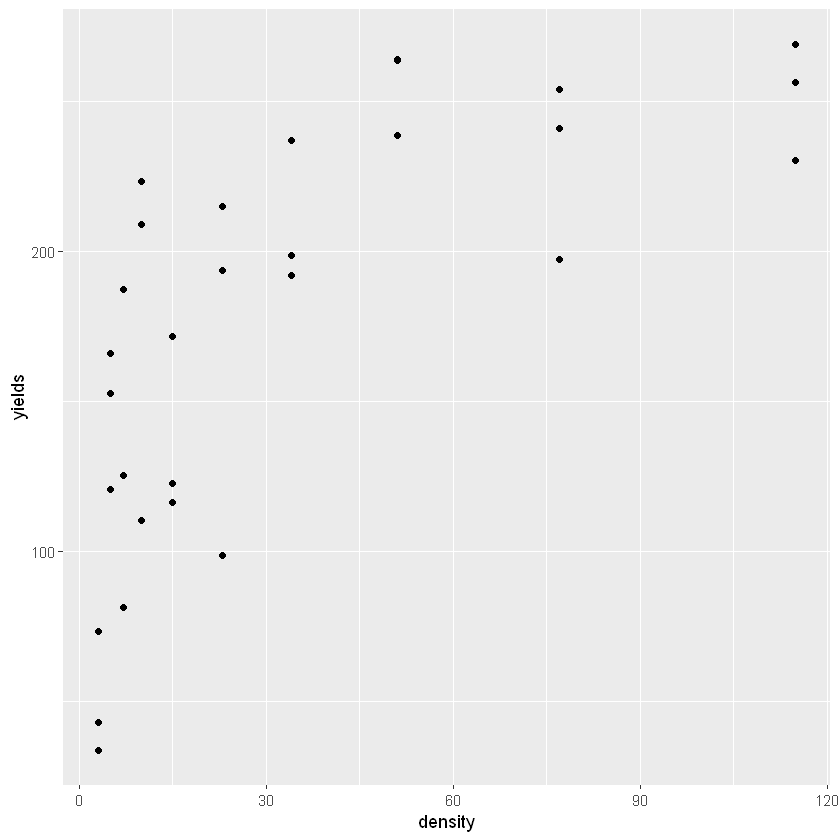

In [22]:
# (x,y)
ggplot(barley,aes(x,y))+geom_point()+labs(y = 'yields', x = 'density')

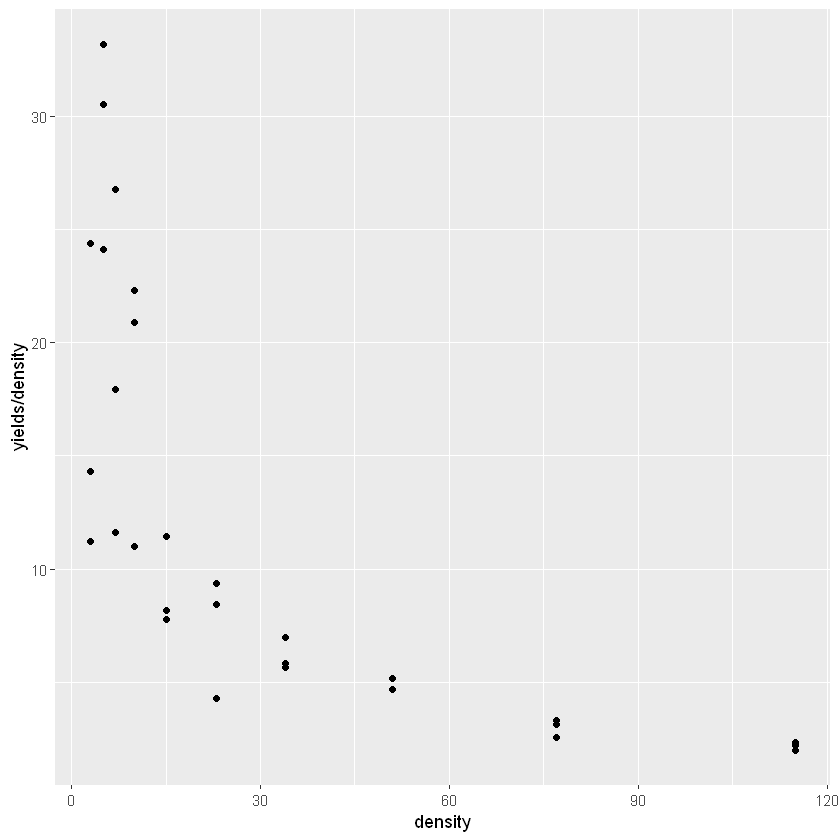

In [23]:
# (x, y/x)
ggplot(barley,aes(x,y/x))+geom_point()+labs(y = 'yields/density',x = 'density')

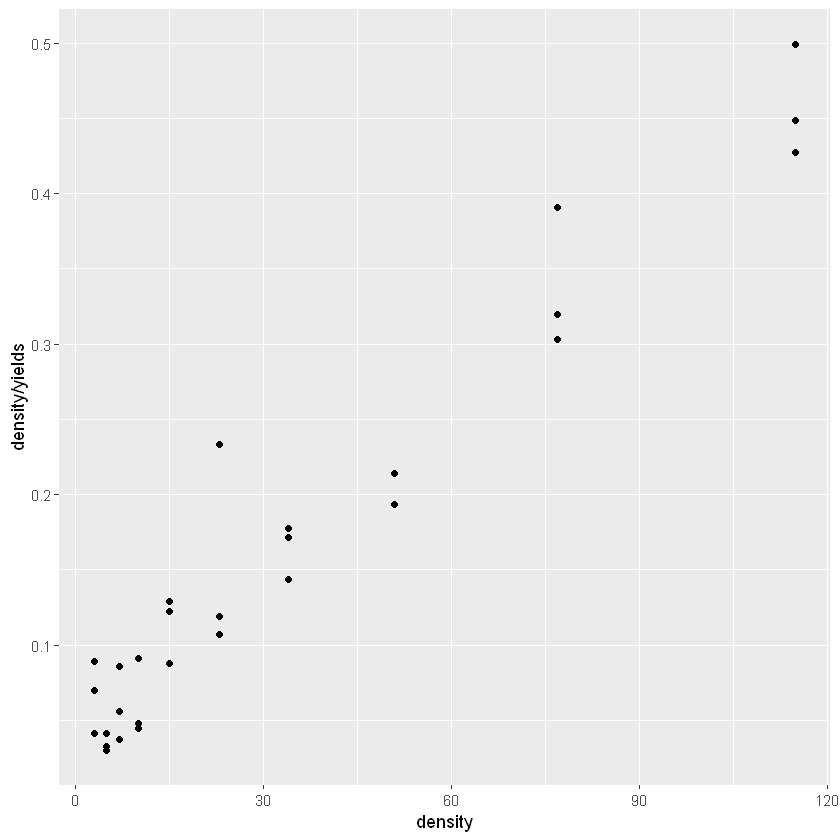

In [24]:
# (x, x/y)
ggplot(barley,aes(x,x/y))+geom_point()+labs(y = 'density/yields',x = 'density')

### (b) Gamma GLM : 모수 추정 

* $y_i \sim \Gamma(\alpha_i, \beta_i) , E(y_i) = \mu_i = \alpha\beta_i$
* $\mu_i = x_i / (a+bx_i)$ 
* $\theta_i = g(\mu_i) = (1/\mu_i) = (a+bx_i)/x_i = b+a/x_i = \beta_0 + \beta_1/x_i, i=1, ... , n$ 

In [25]:
library(MASS)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [26]:
G1 <- glm(y ~ I(1/x), family = Gamma(link="inverse") ,data=barley)
summary(G1)


Call:
glm(formula = y ~ I(1/x), family = Gamma(link = "inverse"), data = barley)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70686  -0.16982  -0.00282   0.12930   0.49392  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0038033  0.0003754  10.131 7.22e-11 ***
I(1/x)      0.0285537  0.0050312   5.675 4.40e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.08761677)

    Null deviance: 6.5168  on 29  degrees of freedom
Residual deviance: 2.7018  on 28  degrees of freedom
AIC: 323.14

Number of Fisher Scoring iterations: 5


In [27]:
alpha <- gamma.shape(G1)[1] 
beta0 <- G1$coefficients[1] ; beta1 <- G1$coefficients[2]

mle <- as.numeric(c(alpha, beta0, beta1))
se <- as.numeric(c(gamma.shape(G1)[2], summary(G1)$coefficients[1:2,2]))

parameter <- data.frame(MLE = mle, lower_bound = mle - 1.96*se, upper_bound = mle + 1.96*se)
rownames(parameter) <- c("CI_alpha", "CI_beta0", "CI_beta1") ; parameter

,MLE,lower_bound,upper_bound
,<dbl>,<dbl>,<dbl>
CI_alpha,11.267622248,5.647810704,16.887433791
CI_beta0,0.003803273,0.003067437,0.004539109
CI_beta1,0.028553733,0.018692589,0.038414876


### (c) 모형의 타당성 검토 

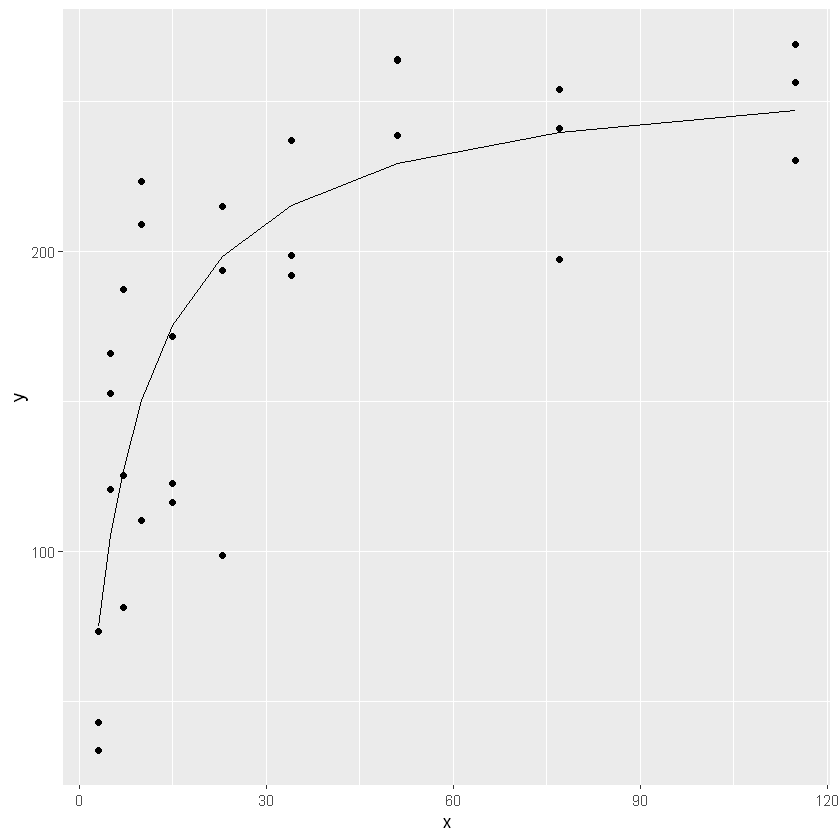

In [28]:
ggplot(barley, aes(x,y)) + geom_point() + geom_line(aes(y=G1$fitted.values))

### (d) 최적 Gamma GLM : 블록효과, 비선형 항 포함 
* $y_i \sim \Gamma(\alpha_i, \beta_i) , E(y_i) = \mu_i = \alpha\beta_i$
* $\mu_i = x_i / (a+bx_i+cx_i^2)$ 
* $\theta_i = g(\mu_i) = (1/\mu_i) = (a+bx_i+cx_i^2)/x_i$        
  $= (a_i / x_i + b_i + cx_i)$        
  $= (\alpha_1 + \sum_{j=2}^{3} \alpha_j B_{ij}) / x_i + (\beta_1 + \sum_{j=2}^{3} \beta_j B_{ij}) + \gamma x_{i}, i = 1, ... ,n$

In [29]:
barley$block <- as.factor(barley$block)
G2 <- glm(y ~ I(1/x) + block*I(1/x) + block + x + x*x, family = Gamma(link = "inverse"), data=barley)
step(G2, direction="both", alpha=0.15)

Start:  AIC=330.91
y ~ I(1/x) + block * I(1/x) + block + x + x * x

               Df Deviance    AIC
- I(1/x):block  2   2.6774 328.48
- x             1   2.5109 328.91
<none>              2.5109 330.91

Step:  AIC=328.86
y ~ I(1/x) + block + x

               Df Deviance    AIC
- block         2   2.7011 325.10
- x             1   2.6782 326.87
<none>              2.6775 328.86
+ I(1/x):block  2   2.5109 331.14
- I(1/x)        1   4.7021 347.77

Step:  AIC=325.13
y ~ I(1/x) + x

         Df Deviance    AIC
- x       1   2.7018 323.14
<none>        2.7011 325.13
+ block   2   2.6775 328.87
- I(1/x)  1   4.7264 345.42

Step:  AIC=323.14
y ~ I(1/x)

         Df Deviance    AIC
<none>        2.7018 323.14
+ x       1   2.7011 325.13
+ block   2   2.6782 326.87
- I(1/x)  1   6.5168 364.68



Call:  glm(formula = y ~ I(1/x), family = Gamma(link = "inverse"), data = barley)

Coefficients:
(Intercept)       I(1/x)  
   0.003803     0.028554  

Degrees of Freedom: 29 Total (i.e. Null);  28 Residual
Null Deviance:	    6.517 
Residual Deviance: 2.702 	AIC: 323.1

In [30]:
# 최적 모형 : glm(formula = y ~ I(1/x), family = Gamma(link = "inverse"), data = barley)
G3 <- glm(formula = y ~ I(1/x), family = Gamma(link = "inverse"), data = barley)
alpha <- gamma.shape(G3)[1] 
beta0 <- G3$coefficients[1] ; beta1 <- G3$coefficients[2]

mle <- as.numeric(c(alpha, beta0, beta1))
se <- as.numeric(c(gamma.shape(G3)[2],summary(G3)$coefficients[1:2,2]))

parameter <- data.frame(MLE = mle, lower_bound = mle - 1.96*se, upper_bound = mle + 1.96*se)
rownames(parameter) <- c("CI_alpha", "CI_beta0", "CI_beta1") ; parameter

,MLE,lower_bound,upper_bound
,<dbl>,<dbl>,<dbl>
CI_alpha,11.267622248,5.647810704,16.887433791
CI_beta0,0.003803273,0.003067437,0.004539109
CI_beta1,0.028553733,0.018692589,0.038414876


### (e) 추정된 모형의 의미 

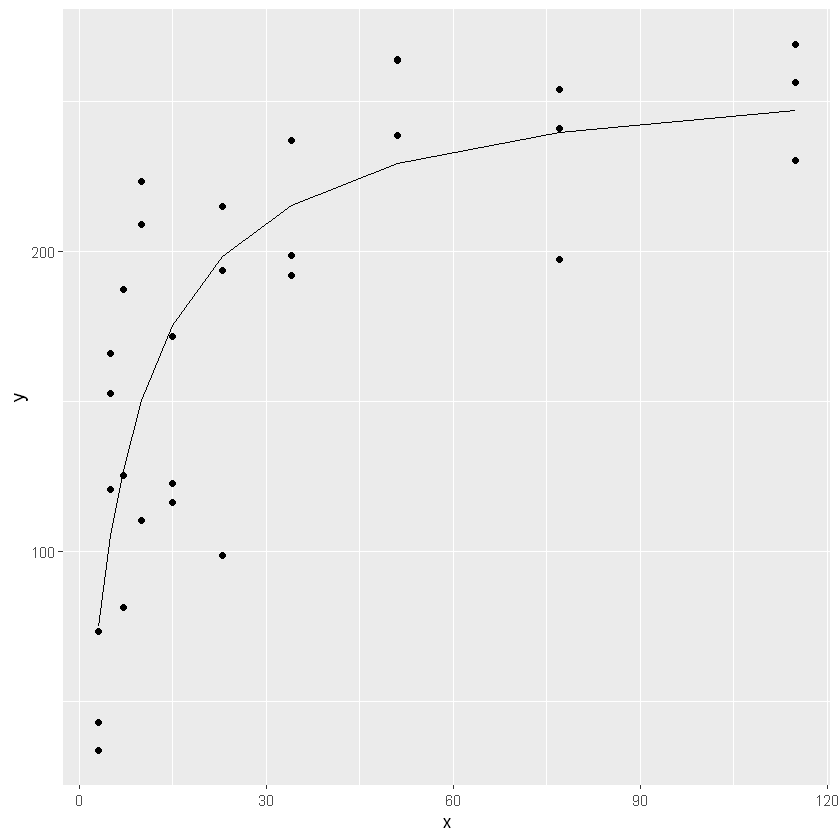

In [31]:
ggplot(barley, aes(x,y)) + geom_point() + geom_line(aes(y=G3$fitted.values))

* (b)와 동일한 모형이다. 
* 블록변수는 모델에서 변수선택되지 않았으므로, 블록효과는 유의하지 않다.
* 단위 면적당 심은 보리 씨앗의 숫자(x)가 많아질수록 단위 면적당 보리 수확량(y)의 수가 급격히 증가하다가, 씨앗수가 30을 넘어가면서 수확량이 크게 증가하지 않음을 알 수 있다.

### (f) (xi, zi/xi) 산점도 
* $x_i$ : 화분에 파종한 씨앗의 수 
* $z_i$ : 실제로 열매를 맺은 씨앗의 수 

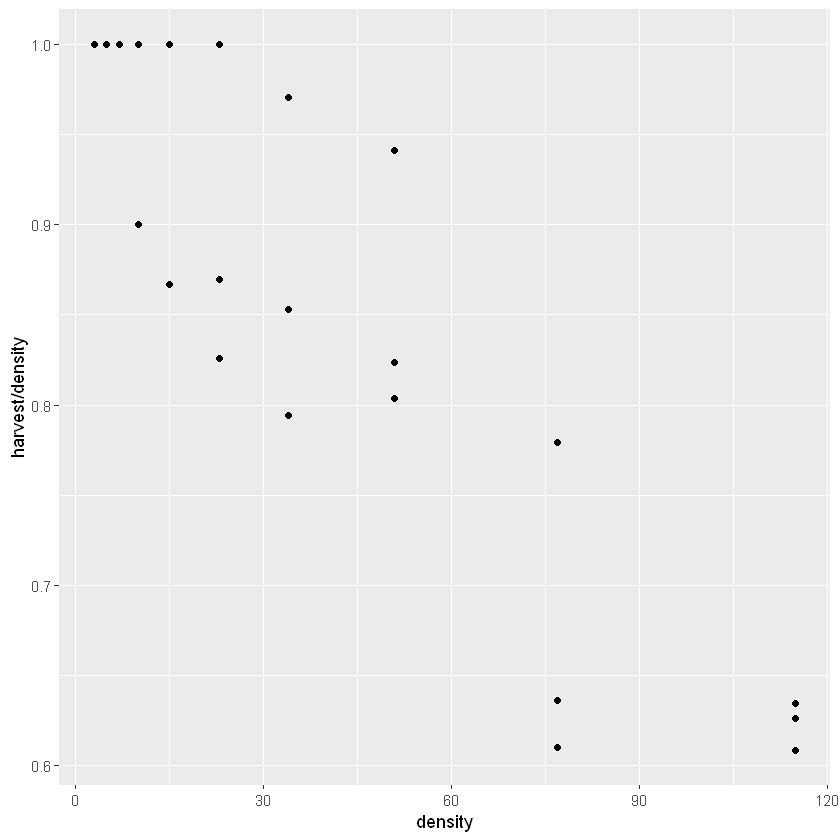

In [32]:
# (x, z/x)
ggplot(barley, aes(x,z/x))+geom_point()+labs(y = 'harvest/density',x = 'density')

* x와 z/x는 음의 상관관계가 있다. 화분에 파종한 씨앗수(x)가 적을 때, 파종한 씨앗수 대비 열매를 맺은 씨앗수 비율(z/x)는 1에 가깝다. 
* 화분에 파종한 씨앗수(x)가 30이 넘으면, 파종씨앗수 대비 열매를 맺는 씨앗수 비율이 80%아래로 내려간다. 씨를 일정 이상 많이 뿌릴수록 파종한 씨앗수 대비 열매를 맺은 씨앗수는 줄어든다.

### (g) Logistic GLM 
* $z_i \sim bin(x_i, p_i)$ 
* $p_i = G(\alpha_1 + \sum_{j=2}^{3} \alpha_j B_{ij}) / x_i + (\beta_1 + \sum_{j=2}^{3} \beta_j B_{ij}) + ...)$
* $G(u)$ : 누적 분포함수 (ex. Normal(0,1), Logistic(0,1), Gompertz(0,1)) 

In [33]:
M1<-glm(cbind(z,x-z)~x+block+block*x, family=binomial(link="logit"),data=barley)
M2<-glm(cbind(z,x-z)~x+block+block*x, family=binomial(link="probit"),data=barley)
M3<-glm(cbind(z,x-z)~x+block+block*x, family=binomial(link="cloglog"),data=barley)
M4<-glm(cbind(z,x-z)~log(x)+block+block*log(x), family=binomial(link="logit"),data=barley)
M5<-glm(cbind(z,x-z)~log(x)+block+block*log(x), family=binomial(link="probit"),data=barley)
M6<-glm(cbind(z,x-z)~log(x)+block+block*log(x), family=binomial(link="cloglog"),data=barley)
M7<-glm(cbind(z,x-z)~I(1/x)+ block+block*I(1/x), family=binomial(link="logit"),data=barley)
M8<-glm(cbind(z,x-z)~I(1/x)+ block+block*I(1/x), family=binomial(link="probit"),data=barley)
M9<-glm(cbind(z,x-z)~I(1/x)+ block+block*I(1/x), family=binomial(link="cloglog"),data=barley)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [34]:
models <- list(M1,M2,M3,M4,M5,M6,M7,M8,M9)
for(m in models){
  step(m, direction = 'backward')$aic
}

Start:  AIC=99.97
cbind(z, x - z) ~ x + block + block * x

          Df Deviance     AIC
<none>         28.748  99.972
- x:block  2   40.567 107.792
Start:  AIC=97.35
cbind(z, x - z) ~ x + block + block * x

          Df Deviance    AIC
<none>         26.126  97.35
- x:block  2   37.165 104.39
Start:  AIC=93.59
cbind(z, x - z) ~ x + block + block * x

          Df Deviance    AIC
<none>         22.365 93.590
- x:block  2   31.105 98.329
Start:  AIC=85.19
cbind(z, x - z) ~ log(x) + block + block * log(x)

               Df Deviance    AIC
<none>              13.963 85.187
- log(x):block  2   28.655 95.880
Start:  AIC=83.81
cbind(z, x - z) ~ log(x) + block + block * log(x)

               Df Deviance    AIC
<none>              12.582 83.806
- log(x):block  2   26.894 94.119
Start:  AIC=82.73
cbind(z, x - z) ~ log(x) + block + block * log(x)

               Df Deviance    AIC
<none>              11.509 82.733
- log(x):block  2   24.804 92.029
Start:  AIC=83.65
cbind(z, x - z) ~ I(1/x) + b

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


               Df Deviance     AIC
<none>              13.539  84.764
- I(1/x):block  2   38.238 105.462
Start:  AIC=86.98
cbind(z, x - z) ~ I(1/x) + block + block * I(1/x)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


               Df Deviance     AIC
<none>              15.758  86.982
- I(1/x):block  2   42.097 109.321


### (h) 최적 모형 

In [35]:
# AIC가 가장 작은 M6 모형이 최적 모형! 
# M6 : cbind(z, x - z) ~ log(x) + block + block * log(x)
summary(step(M6, direction="both"))

Start:  AIC=82.73
cbind(z, x - z) ~ log(x) + block + block * log(x)

               Df Deviance    AIC
<none>              11.509 82.733
- log(x):block  2   24.804 92.029



Call:
glm(formula = cbind(z, x - z) ~ log(x) + block + block * log(x), 
    family = binomial(link = "cloglog"), data = barley)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.40228  -0.09706   0.04595   0.52798   1.32748  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     5.7022     0.9086   6.276 3.48e-10 ***
log(x)         -1.2140     0.2067  -5.872 4.30e-09 ***
block2         -3.1299     1.0086  -3.103 0.001914 ** 
block3         -3.5307     0.9918  -3.560 0.000371 ***
log(x):block2   0.6527     0.2321   2.812 0.004919 ** 
log(x):block3   0.7479     0.2281   3.278 0.001044 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 143.734  on 29  degrees of freedom
Residual deviance:  11.509  on 24  degrees of freedom
AIC: 82.733

Number of Fisher Scoring iterations: 7


* 최적 모형 : $p_i = G(5.702 -1.214\ln{x_i} -3.130B_2 -3.530B_3 +0.653B_2\ln{x_i} +0.748B_3\ln{x_i}$
* $G(\centerdot) \sim Gompertz$ 